## Time averaging with Thickness Weighted Averaging (TWA)

An alternative to averaging at a constant depth is to average following isopycnals. The averaging that results is referred to as TWA, and here we will evaluate the tracer equations in this frame. 

The model output was saved as snapshots at 3days for 16.5 years. Here we use that saved output to first transform to isopycnal coordinates, and then do a TWA in that. 



In [1]:
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt

import xgcm 
%matplotlib inline

In [2]:
import numpy as np

In [3]:
ds_dir = '/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored_3day_output/run_tracers_restored/'

In [4]:
ds = xr.open_zarr('/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored_3day_output/run_tracers_restored_zarr/')

In [5]:
# drop variables that have different axis, and not useful for TWA 
ds = ds.drop_vars(['Eta', 'PH', 'PHL','W'])

First we cast to buoyancy surface. This involves moving all the variables from x,y,z,t grid to
x,y,b,t grid. Essentially go from a regular z grid to a regular b grid. 

In [6]:
from xgcm import Grid

In [7]:
grid = Grid(ds, periodic='X')

In [8]:
ds['U'] = grid.interp(ds['U'], 'X')
ds['V'] = grid.interp(ds['V'], 'Y', boundary='extend')

In [9]:
Tcenter = np.linspace(0,8, 101)
dT = Tcenter[1] - Tcenter[0]
Touter = np.append(Tcenter - dT/2, Tcenter[-1] + dT/2)

In [10]:
# select a part of the data during initial calculations
ds = ds.isel(time=slice(0, 800))

In [11]:
ds = ds.chunk({'Z':-1, 'time':1, 'XC':400, 'YC':400,
                  'XC':400, 'YG':400, 'Zl':-1})

In [12]:
# cast available variables into isopycnal coordinates 
ds_iso = xr.Dataset()

for var_name in ds.keys():
    print(var_name)
    if var_name != 'T':
        ds_iso[var_name] = grid.transform(ds[var_name], 'Z', Tcenter,
                        target_data=ds['T'], method='linear')

PTRACER01
PTRACER02
PTRACER03
PTRACER04
PTRACER05
PTRACER06
PTRACER07
PTRACER08
PTRACER09
PTRACER10
PTRACER11
PTRACER12
PTRACER13
PTRACER14
PTRACER15
PTRACER16
PTRACER17
PTRACER18
PTRACER19
PTRACER20
T
U
V


In [13]:
# this is the variable \zeta 
Z_grid = ds.Z*ds['T']/ds['T'] # convert Z array to a 3D field
ds_iso['zeta'] = grid.transform(Z_grid, 'Z', Tcenter, 
                        target_data=ds['T'], method='linear')

In [14]:
ds_iso = ds_iso.assign_coords({'Tc':Touter})

In [15]:
grid_iso = Grid(ds_iso, coords={'T':{'center':'T', 'outer':'Tc'}},
                periodic='X')

In [16]:
grid_iso

<xgcm.Grid>
T Axis (not periodic, boundary=None):
  * center   T --> outer
  * outer    Tc --> center

In [17]:
# thickness
ds_iso['sigma'] = grid_iso.interp(grid_iso.diff(ds_iso['zeta'], 'T', boundary='extend')/ dT, 
                             'T', boundary='extend')

In [21]:
ds_iso

<xarray.Dataset>
Dimensions:    (T: 101, Tc: 102, XC: 400, YC: 400, time: 800)
Coordinates:
    Depth      (YC, XC) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
  * XC         (XC) float32 2500.0 7500.0 12500.0 ... 1992500.0 1997500.0
  * YC         (YC) float32 2500.0 7500.0 12500.0 ... 1992500.0 1997500.0
    iter       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    rA         (YC, XC) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
  * time       (time) timedelta64[ns] 61023 days 61026 days ... 63420 days
  * T          (T) float64 0.0 0.08 0.16 0.24 0.32 ... 7.68 7.76 7.84 7.92 8.0
  * Tc         (Tc) float64 -0.04 0.04 0.12 0.2 0.28 ... 7.72 7.8 7.88 7.96 8.04
Data variables:
    PTRACER01  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER02  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER03  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER04  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER05  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER06  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER07  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER08  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER09  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER10  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER11  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER12  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER13  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER14  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER15  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER16  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER17  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER18  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER19  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    PTRACER20  (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    U          (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    V          (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    zeta       (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 101), meta=np.ndarray>
    sigma      (time, YC, XC, T) float64 dask.array<chunksize=(1, 400, 400, 1), meta=np.ndarray>

In [18]:
# cast into averages  
ds_hat = xr.Dataset()

sigma_bar = ds_iso['sigma'].mean('time')
zeta_bar = ds_iso['zeta'].mean('time')

for var_name in ds_iso.keys():
    
    if (var_name != 'zeta' and var_name != 'sigma'):
        print(var_name)
        ds_hat[var_name] = (ds_iso[var_name]*ds_iso['sigma']).mean('time')/sigma_bar

PTRACER01
PTRACER02
PTRACER03
PTRACER04
PTRACER05
PTRACER06
PTRACER07
PTRACER08
PTRACER09
PTRACER10
PTRACER11
PTRACER12
PTRACER13
PTRACER14
PTRACER15
PTRACER16
PTRACER17
PTRACER18
PTRACER19
PTRACER20
U
V


In [19]:
zeta_bar.nbytes/1e9

0.12928

In [29]:
# eddy corrs 

ds_twa_eddy_u = xr.Dataset()
ds_twa_eddy_v = xr.Dataset()

upp = ds_iso['U'] - ds_hat['U']
vpp = ds_iso['V'] - ds_hat['V']

for var_name in ds_hat.keys():
    if (var_name != 'U' and var_name != 'V'):
        print(var_name)
        
        ds_twa_eddy_u['U_'+var_name] = ((ds_iso[var_name] - ds_hat[var_name])*upp*ds_iso['sigma']).mean('time')/sigma_bar
        ds_twa_eddy_v['V_'+var_name] = ((ds_iso[var_name] - ds_hat[var_name])*vpp*ds_iso['sigma']).mean('time')/sigma_bar

PTRACER01
PTRACER02
PTRACER03
PTRACER04
PTRACER05
PTRACER06
PTRACER07
PTRACER08
PTRACER09
PTRACER10
PTRACER11
PTRACER12
PTRACER13
PTRACER14
PTRACER15
PTRACER16
PTRACER17
PTRACER18
PTRACER19
PTRACER20


In [20]:
%%time
zeta_bar.load();
zeta_bar.to_netcdf('zeta_bar_800.nc')

/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: divide by zero encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 59min 6s, sys: 13min 56s, total: 1h 13min 3s
Wall time: 2min 11s


In [32]:
%%time
sigma_bar.load();
sigma_bar.to_netcdf('sigma_bar_800.nc')

/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: divide by zero encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 51min 58s, sys: 16min 52s, total: 1h 8min 50s
Wall time: 2min 21s


In [33]:
%%time
ds_hat.load();
ds_hat.to_netcdf('ds_hat_800.nc')

/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: divide by zero encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 1d 5h 33min 51s, sys: 22h 45min 7s, total: 2d 4h 18min 58s
Wall time: 1h 48min 58s


In [ ]:
%%time
ds_twa_eddy_u.load();
ds_twa_eddy_u.to_netcdf('ds_twa_eddy_u_800.nc')

/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: divide by zero encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [ ]:
%%time
ds_twa_eddy_v.load();
ds_twa_eddy_v.to_netcdf('ds_twa_eddy_v_800.nc')

/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: divide by zero encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)


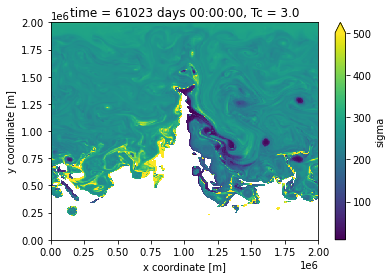

In [67]:
sigma.isel(time=0).sel(Tc=3, method='nearest').plot(vmax=500)

/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: divide by zero encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)


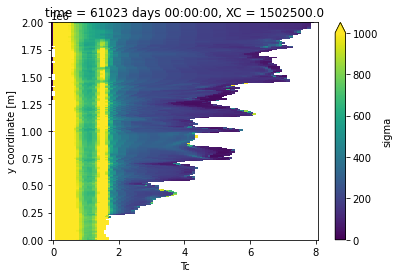

In [69]:
sigma.isel(time=0).sel(XC=1500e3, method='nearest').plot(vmax=1000)

In [73]:
C1hat = ((C1tilde * grid_iso.interp(sigma, 'T', boundary='extend')).mean('time')/
         grid_iso.interp(sigma, 'T', boundary='extend').mean('time'))

/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: divide by zero encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/home/dbalwada/.conda/envs/pangeo/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


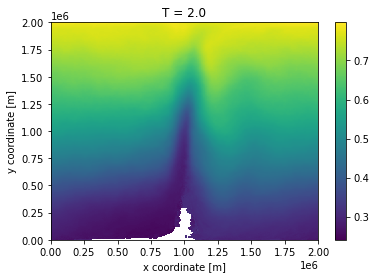

In [75]:
C1hat.sel(T=2).plot()